<h1>KNN</h1>

Este cuaderno presenta el uso de K-Nearest Neighbors (KNN) para la imputación de valores faltantes. KNN es un algoritmo de aprendizaje basado en instancias que puede utilizarse para estimar valores faltantes al basarse en las observaciones más similares (vecinos más cercanos) dentro del conjunto de datos.

Se utilizan los datos reducidos debido a la alta demanda computacional del algoritmo, especialmente cuando se trabaja con conjuntos de datos grandes o con muchas características.

El objetivo de este cuaderno es:

- Utilizar KNN para imputar los valores faltantes en un conjunto de datos basándose en los k vecinos más cercanos, con la combinatoria de varios vecinos diferentes.
- Evaluar el rendimiento de KNN en la imputación bajo distintos niveles de datos incompletos.
- Obtener datos para comprar resultados con otros enfoques de imputación.

Descripción del enfoque
- Imputación basada en similitud: KNN selecciona las observaciones más cercanas para estimar los valores faltantes de una muestra.
- Evaluación: Se analiza la efectividad de KNN bajo distintos niveles de datos faltantes 

## Importación de librerias



In [1]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import os


# Dataset

## Loading data

In [2]:
df_train = pd.read_parquet('../data/processed/df_train_reduced.parquet')
df_test= pd.read_parquet('../data/processed/df_test_reduced.parquet')
df_test_missing_10 = pd.read_parquet('../data/processed/df_test_reduced_missing_10.parquet')
df_test_missing_20 = pd.read_parquet('../data/processed/df_test_reduced_missing_20.parquet')
df_test_missing_30 = pd.read_parquet('../data/processed/df_test_reduced_missing_30.parquet')
df_test_missing_40 = pd.read_parquet('../data/processed/df_test_reduced_missing_40.parquet')

In [3]:
df_test_missing_10.head(10)

,10335183_chrXV_303214_G_T,10341838_chrXV_309869_T_C,10341923_chrXV_309954_G_A,10342190_chrXV_310221_T_C,10342543_chrXV_310574_A_G,10344120_chrXV_312151_C_T,10346156_chrXV_314187_C_G,10349298_chrXV_317329_C_T,3141305_chrV_249350_C_T,10383039_chrXV_351070_C_T,...,10640336_chrXV_608367_C_T,1428699_chrIV_68677_T_C,1428933_chrIV_68911_A_C,6970183_chrXI_391971_C_T,6970060_chrXI_391848_C_T,6969970_chrXI_391758_T_A,3698349_chrVI_229520_A_G,6969924_chrXI_391712_C_T,5535875_chrIX_143302_C_T,7948843_chrXII_703815_C_T
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0
2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,2.0,1.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,...,1.0,2.0,2.0,2.0,NaN,2.0,NaN,2.0,2.0,2.0
4,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0,...,1.0,1.0,1.0,2.0,2.0,NaN,2.0,2.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,NaN,2.0,1.0,2.0,2.0,2.0
6,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,...,2.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0
7,2.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
9,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2.0,2.0,1.0


In [4]:
df_train.head(10)

,10335183_chrXV_303214_G_T,10341838_chrXV_309869_T_C,10341923_chrXV_309954_G_A,10342190_chrXV_310221_T_C,10342543_chrXV_310574_A_G,10344120_chrXV_312151_C_T,10346156_chrXV_314187_C_G,10349298_chrXV_317329_C_T,3141305_chrV_249350_C_T,10383039_chrXV_351070_C_T,...,10640336_chrXV_608367_C_T,1428699_chrIV_68677_T_C,1428933_chrIV_68911_A_C,6970183_chrXI_391971_C_T,6970060_chrXI_391848_C_T,6969970_chrXI_391758_T_A,3698349_chrVI_229520_A_G,6969924_chrXI_391712_C_T,5535875_chrIX_143302_C_T,7948843_chrXII_703815_C_T
0,1,1,1,1,1,1,1,1,2,2,...,2,2,2,1,1,1,2,1,1,1
1,2,2,2,2,2,2,2,2,1,1,...,1,2,2,1,1,1,1,1,1,2
2,2,2,2,2,2,2,2,1,2,1,...,1,1,1,2,2,2,1,2,2,1
3,1,1,1,1,1,1,1,1,1,2,...,2,1,1,2,2,2,2,2,2,2
4,2,2,2,2,2,2,2,2,1,2,...,1,2,2,1,1,1,2,1,2,1
5,2,2,2,2,2,2,2,2,2,2,...,2,1,1,1,1,1,1,1,1,1
6,1,1,1,1,1,1,1,1,1,1,...,2,2,2,2,2,2,1,2,1,2
7,2,2,2,2,2,2,2,2,1,1,...,1,2,2,2,2,2,2,2,1,1
8,1,1,1,1,1,1,1,1,2,1,...,1,1,1,1,1,1,1,1,2,1
9,1,1,1,1,1,1,1,1,2,2,...,2,2,2,1,1,1,2,1,1,2


### Mostramos el numero de clases de entrenamieno y verificamos que están balanceadas

In [5]:
# Contar los valores de 0 y 1 en todo el DataFrame
total_counts = df_train.apply(pd.Series.value_counts).sum(axis=1)
print("Conteo total de clases en todo el DataFrame:")
print(total_counts)

Conteo total de clases en todo el DataFrame:
1    1756511
2    1756489
dtype: int64


## Modelo: KNN

Se define la función que se encarga de entrenar el modelo

In [6]:
def evaluate_knn_imputation(df_train, df_test, missingness_levels, n_neighbors_list):
    results = {
        "MSE": [],
        "MAE": [],
        "R2": []
    }
    
    # Crear un diccionario para guardar los datasets imputados
    imputed_datasets = {}
    
    for n_neighbors in n_neighbors_list:
        print(f"\nEvaluando KNN con {n_neighbors} vecinos...")
        
        # Imputar valores para diferentes niveles de missingness
        for level in missingness_levels:
            df_test_missing = globals()[f'df_test_missing_{level}']  # Suponiendo que tienes variables df_test_missing_10, df_test_missing_20, etc.
            
            # Inicializa el imputador KNN
            knn_imputer = KNNImputer(n_neighbors=n_neighbors)
            
            # Imputa los valores faltantes
            df_test_imputed = pd.DataFrame(knn_imputer.fit_transform(df_test_missing), columns=df_test_missing.columns)
            
            # Guarda el dataset imputado en una variable global
            imputed_datasets[f'df_test_imputed_{level}_neighbors_{n_neighbors}'] = df_test_imputed
            
            # Calcula métricas
            mse = mean_squared_error(df_test, df_test_imputed)
            mae = mean_absolute_error(df_test, df_test_imputed)
            r2 = r2_score(df_test, df_test_imputed)
            
            # Guarda las métricas
            results["MSE"].append(mse)
            results["MAE"].append(mae)
            results["R2"].append(r2)
    
    return results, imputed_datasets

In [7]:
# Define una lista de valores para el número de vecinos
n_neighbors_list = [3, 5, 7,10]
missingness_levels=[10,20,30,40]

# Ejecutar la evaluación
results, imputed_datasets = evaluate_knn_imputation(df_train, df_test, missingness_levels, n_neighbors_list)

# Convertir resultados a un DataFrame para facilitar la visualización
results_df = pd.DataFrame(results, index=pd.MultiIndex.from_product([n_neighbors_list, missingness_levels], names=['Vecinos', 'Missingness']))
print("\nResultados de las métricas de KNN:")
print(results_df)


Evaluando KNN con 3 vecinos...

Evaluando KNN con 5 vecinos...

Evaluando KNN con 7 vecinos...

Evaluando KNN con 10 vecinos...

Resultados de las métricas de KNN:
                          MSE       MAE        R2
Vecinos Missingness                              
3       10           0.015392  0.026635  0.938426
        20           0.031044  0.053788  0.875815
        30           0.047811  0.082325  0.808743
        40           0.064755  0.111713  0.740959
5       10           0.013643  0.027530  0.945426
        20           0.027665  0.055753  0.889332
        30           0.042471  0.085083  0.830102
        40           0.057534  0.115553  0.769848
7       10           0.012990  0.028197  0.948036
        20           0.026414  0.057163  0.894336
        30           0.040529  0.087231  0.837873
        40           0.055015  0.118448  0.779922
10      10           0.012679  0.029019  0.949281
        20           0.025694  0.058752  0.897215
        30           0.039417  0.08

### Visualización de resultados

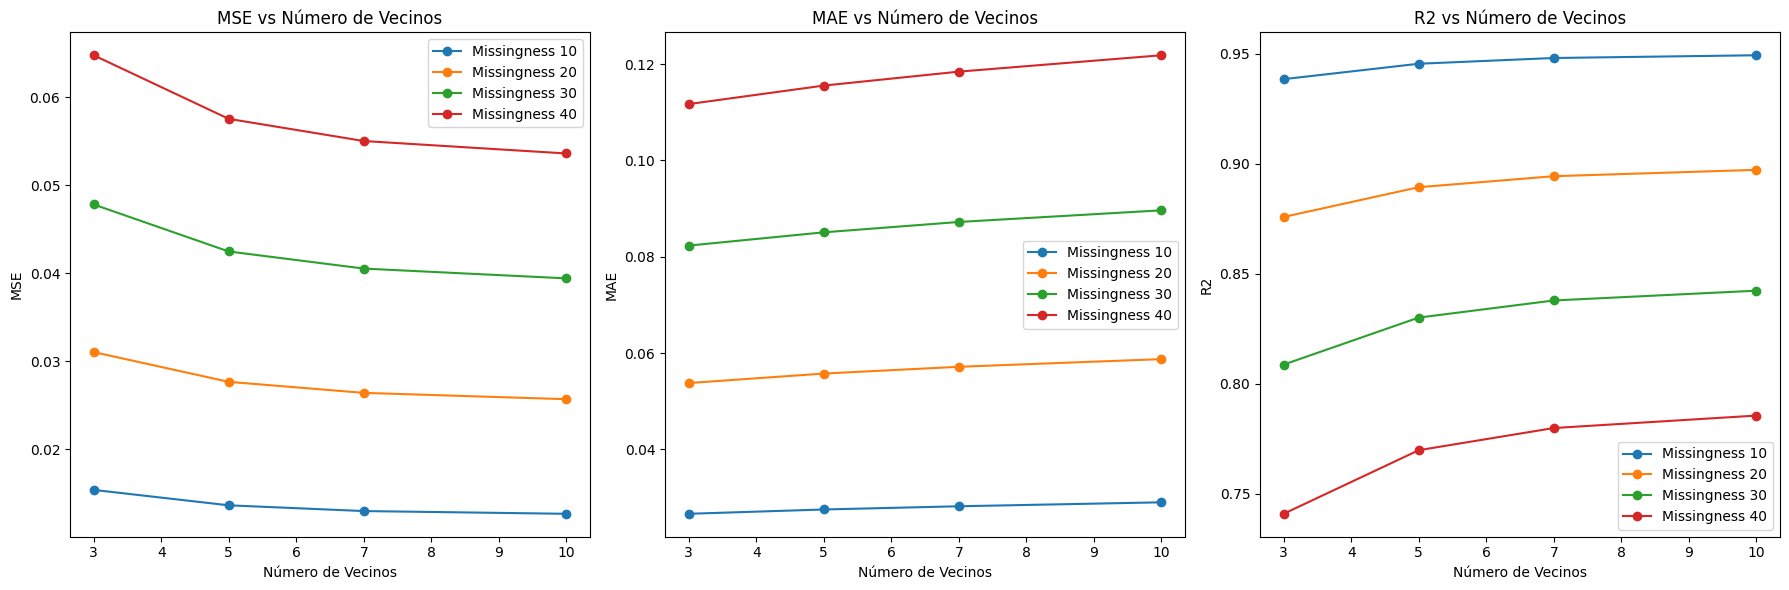

In [8]:

# Visualización de resultados
plt.figure(figsize=(18, 6))

# MSE Plot
plt.subplot(1, 3, 1)
for level in missingness_levels:
    plt.plot(n_neighbors_list, results_df.loc[(slice(None), level), 'MSE'], marker='o', linestyle='-', label=f'Missingness {level}')
plt.xlabel('Número de Vecinos')
plt.ylabel('MSE')
plt.title('MSE vs Número de Vecinos')
plt.legend()

# MAE Plot
plt.subplot(1, 3, 2)
for level in missingness_levels:
    plt.plot(n_neighbors_list, results_df.loc[(slice(None), level), 'MAE'], marker='o', linestyle='-', label=f'Missingness {level}')
plt.xlabel('Número de Vecinos')
plt.ylabel('MAE')
plt.title('MAE vs Número de Vecinos')
plt.legend()

# R2 Plot
plt.subplot(1, 3, 3)
for level in missingness_levels:
    plt.plot(n_neighbors_list, results_df.loc[(slice(None), level), 'R2'], marker='o', linestyle='-', label=f'Missingness {level}')
plt.xlabel('Número de Vecinos')
plt.ylabel('R2')
plt.title('R2 vs Número de Vecinos')
plt.legend()

plt.tight_layout()
plt.show()

### Guardar datasets imputados a partir de los distintos datasets con diferentes porcentajes de missingness y distintos knn

In [9]:
def save_imputed_datasets(df_imputed, level, n_neighbors, output_dir):
    # Crear los directorios si no existen
    os.makedirs(output_dir, exist_ok=True)
    
    # Crear el nombre del archivo que incluye tanto el nivel como el número de vecinos
    file_path = os.path.join(output_dir, f'df_test_missing_{level}_imputed_neighbors_{n_neighbors}.parquet')
    
    # Guardar el DataFrame en formato CSV o Parquet
    df_imputed.to_csv(file_path, index=False)
    print(f"Dataset imputado guardado en {file_path}")

In [10]:
# Guardar los datasets imputados
# Recorremos el diccionario que contiene los datasets imputados
for dataset_name, df_test_imputed in imputed_datasets.items():
    data_output_dir = "../data/generated/KNN"

    # Extraer el número de vecinos y el nivel de missingness del nombre del dataset
    split_name = dataset_name.split('_')
    n_neighbors = split_name[-1]  # El último elemento es el número de vecinos
    level = split_name[3]  # El cuarto elemento es el nivel de missingness

    # Llamar a la función de guardado pasando el dataset imputado y el nombre correcto
    save_imputed_datasets(df_test_imputed, level, n_neighbors, data_output_dir)

Dataset imputado guardado en ../data/generated/KNN/df_test_missing_10_imputed_neighbors_3.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_20_imputed_neighbors_3.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_30_imputed_neighbors_3.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_40_imputed_neighbors_3.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_10_imputed_neighbors_5.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_20_imputed_neighbors_5.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_30_imputed_neighbors_5.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_40_imputed_neighbors_5.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_10_imputed_neighbors_7.parquet
Dataset imputado guardado en ../data/generated/KNN/df_test_missing_20_imputed_neighbors_7.parquet
Dataset imputado gua

Así se cargaría el modelo de ser necesario desde HDF5:
with h5py.File(model_output_path, 'r') as f:
    model_bytes = f['xgboost_model'][()]
    f_model_loaded = joblib.loads(model_bytes)
    